In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from scipy.stats.stats import pearsonr 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv('./Data/train.csv')

In [3]:
target_values = train_df['y'].unique()

In [3]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [172]:
qi_norm = pd.DataFrame(normalize(train_df.sort_values('y').iloc[:, 5:]))
qi_norm

,0,1,2,3,4,5,6,7,8,9,...,13330,13331,13332,13333,13334,13335,13336,13337,13338,13339
0,0.004064,0.001266,-0.003421,-0.005888,-0.003606,0.001864,0.006193,0.006079,0.001923,-0.002785,...,0.017775,0.008496,-0.001649,-0.009272,-0.012787,-0.012757,-0.010829,-0.008894,-0.009035,-0.012600
1,0.001572,0.000524,-0.000841,-0.000407,0.001463,0.001596,-0.002369,-0.008436,-0.011310,-0.007551,...,0.010280,0.035710,0.047936,0.036726,0.009428,-0.015827,-0.025684,-0.020063,-0.007564,0.003508
2,0.000720,0.000352,0.000529,0.001181,0.001176,-0.000330,-0.002522,-0.003430,-0.002009,0.000521,...,0.003998,0.014310,0.020267,0.017006,0.007672,-0.001022,-0.005362,-0.006062,-0.004848,-0.002044
3,-0.000859,0.000079,0.000571,0.000339,-0.000429,-0.001231,-0.001586,-0.001241,-0.000088,0.001939,...,-0.006585,-0.006413,-0.002585,0.002578,0.006019,0.006864,0.006349,0.005644,0.004648,0.002907
4,-0.007259,-0.007689,-0.005933,-0.008578,-0.009363,-0.002220,0.004461,0.003163,-0.000112,0.001333,...,0.008272,-0.007751,0.001863,0.010924,-0.011177,-0.022020,0.000587,0.009555,-0.007466,-0.011520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.004154,0.002908,-0.000483,-0.003414,-0.003900,-0.002586,-0.001639,-0.001960,-0.002268,-0.001152,...,-0.020951,-0.013508,0.009794,0.022566,0.012561,-0.005690,-0.009800,0.004227,0.019275,0.018577
596,-0.000182,0.000541,0.001271,0.001362,0.000380,-0.001305,-0.002467,-0.001886,0.000449,0.002972,...,0.002362,0.013001,0.007742,-0.010129,-0.020572,-0.009886,0.012399,0.022980,0.010135,-0.013893
597,0.003786,0.004499,0.001826,0.000071,0.002491,0.006418,0.005954,-0.000497,-0.007347,-0.007812,...,-0.005043,-0.008313,-0.005320,0.000659,0.005099,0.007119,0.007888,0.006559,0.001239,-0.005780
598,-0.002685,-0.004022,-0.004593,-0.004441,-0.003498,-0.001328,0.002233,0.006182,0.008500,0.007663,...,0.010020,0.015051,0.009805,-0.002088,-0.007052,0.003507,0.021251,0.027770,0.014173,-0.008758


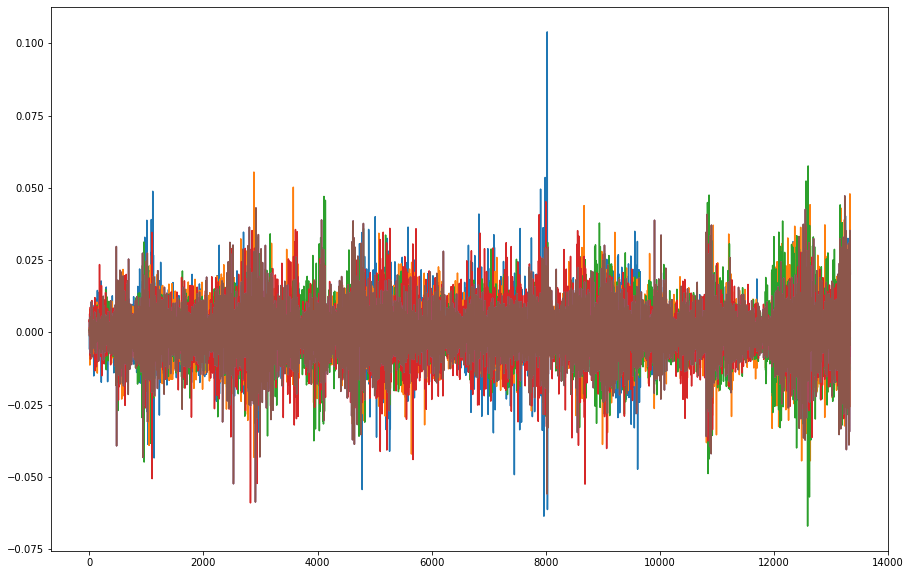

In [174]:
plt.figure(figsize=(15,10))
plt.plot(qi_norm.iloc[0].values.reshape(116, 115).astype(float).flatten())
plt.plot(qi_norm.iloc[1].values.reshape(116, 115).astype(float).flatten())
plt.plot(qi_norm.iloc[2].values.reshape(116, 115).astype(float).flatten())
plt.plot(qi_norm.iloc[-3].values.reshape(116, 115).astype(float).flatten())
plt.plot(qi_norm.iloc[-1].values.reshape(116, 115).astype(float).flatten())
plt.plot(qi_norm.iloc[-1].values.reshape(116, 115).astype(float).flatten())

In [177]:
brain = qi_norm.iloc[0].values.reshape(116, 115).astype(float)

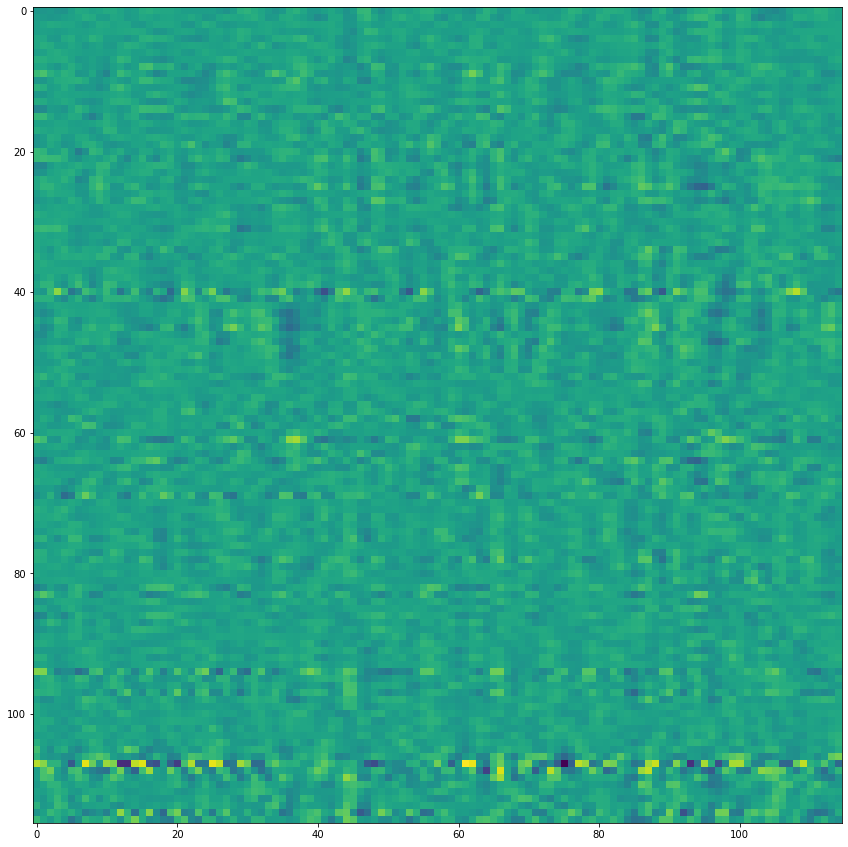

In [189]:
brain = qi_norm.iloc[4].values.reshape(116, 115).astype(float)
plt.figure(figsize=(15,15))
plt.imshow(brain)

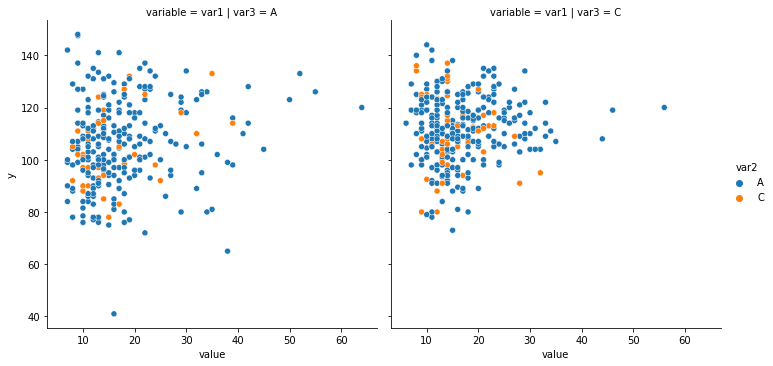

In [111]:
melted = train_df.iloc[:, 1:5].melt(['y', 'var2', 'var3'])
sns.relplot(data=melted, x='value', y='y', row='variable', hue='var2', col='var3')

In [47]:
train_df.iloc[:, 5:120].values.std()

208.9683821067957

In [4]:
# m=np.zeros((99,6670))
m = []
for v in tqdm(range(len(target_values))):
    corr=[]
    df_y = train_df[train_df['y']==target_values[v]].iloc[:, 5:]
    for i in range(0,116):
        roi_i=df_y.iloc[:,i*115:5+(i+1)*115]
        for j in range(i+1,116):
            roi_j=df_y.iloc[:,(j)*115:5+(j+1)*115]
            corr.append(pearsonr(roi_i.values.flatten(),roi_j.values.flatten())[0])
        corr.append(roi_i.values.std() / 200)
        # print(roi_i.values.std() / 200)
    m.append(corr)
m = np.array(m)

  0%|          | 0/99 [00:00<?, ?it/s]


ValueError: x and y must have the same length.

In [191]:
# m=np.zeros((99,6670))
m = []
for v in tqdm(range(len(target_values))):
    corr=[]
    df_y = normalize(train_df[train_df['y']==target_values[v]].iloc[:, 5:])
    for i in range(0,116):
        roi_i=df_y[:, i * 115: (i+1) * 115]
        for j in range(i+1, 116):
            roi_j=df_y[:,j * 115: (j+1) * 115]
            corr.append(pearsonr(roi_i.flatten(),roi_j.flatten())[0])
    m.append(corr)
m = np.array(m)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:40<00:00,  2.46it/s]


In [192]:
m

array([[ 0.40470021, -0.07087103, -0.27204654, ...,  0.31953411,
         0.17719182,  0.32258965],
       [ 0.38177424, -0.03558482, -0.15058525, ...,  0.47555937,
         0.23162718,  0.41700933],
       [ 0.39877801,  0.0651882 , -0.19559565, ...,  0.38006296,
         0.26302298,  0.47615143],
       ...,
       [ 0.43090855, -0.21775683, -0.40646318, ...,  0.12723632,
        -0.13741944,  0.38419469],
       [ 0.64870765,  0.04161721,  0.42212238, ...,  0.30222485,
         0.11180946, -0.00890194],
       [ 0.56510692,  0.26510645, -0.27217593, ...,  0.47288792,
         0.15497693,  0.31053953]])

In [193]:
columns=[f'ROI{i}-ROI{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [89]:
def get_corr(row,test=False):
    if test:
        brain = np.array(row[4:])
    else:
        brain = np.array(row[5:])
    brain = brain.reshape((116, 115)).astype(float)
    corr = np.corrcoef(brain)
    flat = corr[np.triu_indices(corr.shape[0], 1)]
    return flat.tolist()
    # corr = []
    # for i in range(0,116):
    #     roi_i=brain[i*115:(i+1)*115]
    #     for j in range(i+1,116):
    #         roi_j=brain[(j)*115:(j+1)*115]
    #         # print(len(roi_i), len(roi_j))
    #         corr.append(pearsonr(roi_i.flatten(), roi_j.flatten())[0])
    #     corr.append(roi_i.std() / 200)
    # return corr


In [7]:
corr=train_df.progress_apply(lambda x :get_corr(x),axis=1)

  0%|          | 1/600 [00:01<11:29,  1.15s/it]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:13<00:00, 43.42it/s]


In [194]:
#corr_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns).fillna(0)
corr_df=pd.DataFrame(m,columns=columns).fillna(0)
# corr_df=pd.DataFrame(m).fillna(0)
#new_train=corr_df
#new_train['var1']=train_df['var1']
#new_train['y']=train_df['y']

In [195]:
corr_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,0.404700,-0.070871,-0.272047,-0.119192,-0.099817,-0.002492,-0.211906,-0.109672,-0.089326,0.326328,...,0.337181,0.182979,0.121912,0.123365,0.277873,0.197536,0.195872,0.319534,0.177192,0.322590
1,0.381774,-0.035585,-0.150585,-0.105055,-0.243106,0.067594,-0.112186,-0.091049,-0.163581,0.335170,...,0.373602,0.211492,0.139595,0.156055,0.312697,0.181518,0.136859,0.475559,0.231627,0.417009
2,0.398778,0.065188,-0.195596,-0.070920,-0.224212,0.149191,-0.102034,-0.038409,-0.159777,0.329368,...,0.389518,0.219999,0.093237,0.092154,0.281194,0.150554,0.105144,0.380063,0.263023,0.476151
3,0.365064,0.034785,-0.122392,-0.013868,-0.020057,0.036633,-0.041166,0.024877,0.015096,0.260810,...,0.480412,0.254782,0.094723,0.225331,0.363367,0.122472,0.222815,0.254748,0.184416,0.288486
4,0.339223,0.040939,-0.143865,-0.011612,-0.115848,0.202731,-0.025317,0.040955,-0.059588,0.269345,...,0.383363,0.304226,0.168991,0.030929,0.243580,0.154423,0.037800,0.177144,0.014182,0.084517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-0.115663,0.351149,-0.038836,0.223067,0.004195,0.319957,0.030517,0.159190,0.073564,0.437765,...,0.121728,0.318938,0.059053,0.149123,0.502167,-0.034922,0.009250,0.179169,0.015129,0.072416
95,0.477742,-0.062977,0.038081,-0.019106,0.193596,-0.046278,-0.093730,0.160723,0.030468,0.343544,...,0.002552,0.283919,0.236332,0.158249,0.328286,-0.343286,-0.097973,-0.050513,0.062323,0.119114
96,0.430909,-0.217757,-0.406463,-0.127794,-0.122476,-0.223247,-0.346684,-0.108791,-0.248721,0.258565,...,0.355754,-0.047842,0.346101,0.146305,-0.278035,-0.062824,0.105871,0.127236,-0.137419,0.384195
97,0.648708,0.041617,0.422122,0.218517,-0.010028,0.198131,0.160266,-0.095230,-0.382416,0.069999,...,0.251380,0.480733,-0.041561,-0.119244,0.243030,0.092524,0.197212,0.302225,0.111809,-0.008902


In [208]:
new_train = corr_df
corr_df['y']=target_values
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)
svr_reg=SVR(C= 10, degree= 6, kernel= 'poly').fit(X_train, y_train)
# svr_reg=SVR(C= 10, kernel= 'rbf').fit(X_train, y_train)
y_pred=svr_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred,squared=False))

19.671999354755677


In [224]:
new_train = corr_df
corr_df['y']=target_values
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)
svr_reg=RandomForestRegressor().fit(X_train, y_train)
y_pred=svr_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred,squared=False))

20.32972569908409


In [232]:
#new_train = corr_df
#corr_df['y']=target_values
#X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)
svr_reg=SVR(C= 10, degree= 6, kernel= 'poly').fit(X_train, y_train)
y_pred=svr_reg.predict(X_train)
print(mean_squared_error(y_train, y_pred,squared=False))

8.106683873518891


In [16]:
corr_df['y']=target_values

In [13]:
first_cols = train_df.iloc[:, [1,2,3,4]]

In [14]:
new_train = first_cols.join(corr_df)

In [15]:
new_train['var2'].replace({'A':0, 'C':1}, inplace = True)
new_train['var3'].replace({'A':0, 'C':1}, inplace = True)

In [16]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,113.0,19,0,0,0.353489,-0.128682,-0.319849,-0.324166,-0.246387,-0.025520,...,0.683160,0.349207,0.184093,0.295171,0.598233,0.224943,0.198616,0.627310,0.493860,0.762508
1,119.0,14,1,0,0.266270,0.215177,-0.324562,0.035001,-0.268579,0.299189,...,0.701862,0.410321,0.140138,0.134177,0.542688,0.266197,0.232802,0.610117,0.595988,0.759333
2,109.0,13,0,0,0.176860,0.368124,0.129039,0.042282,-0.109159,0.320363,...,0.701880,0.105945,0.015031,0.058321,0.094228,0.005790,0.001743,0.309380,0.356655,0.510192
3,110.0,18,0,0,0.385438,0.128242,-0.336238,-0.117699,-0.216569,-0.300985,...,0.471972,0.129105,-0.086784,0.024874,0.520089,0.097454,0.191578,0.496777,0.437103,0.702825
4,123.0,32,0,0,0.288994,0.126783,-0.036986,-0.107399,-0.018702,0.093512,...,0.502216,0.412209,0.171462,-0.051080,0.296669,0.199877,0.037061,0.084179,-0.195883,0.133420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,110.0,41,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,120.0,64,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,96.0,27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,118.0,29,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
new_train.groupby('y').size().sort_values(ascending=False)

y
100.0    24
113.0    20
109.0    19
119.0    18
108.0    17
         ..
112.5     1
114.5     1
115.5     1
121.5     1
148.0     1
Length: 99, dtype: int64

In [83]:
new_train=new_train.groupby('y').mean().reset_index()

In [26]:
new_train=corr_df

# Train

## Linear Regession

In [54]:
reg = LinearRegression()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(qi_norm, train_df['y'], test_size=0.25, random_state=42)

In [230]:
X_train, y_train = qi_norm, train_df['y']

In [56]:
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred=reg.predict(X_test)

In [58]:
mean_squared_error(y_test, y_pred,squared=False)

21.306007265538923

## SVR

In [34]:
params = [{'kernel' : ['poly'],
        'C' : [1,5,10],
        'degree' : [2,3,4]}]
        #'coef0' : [0.01,10,0.5],
        #'gamma' : ('auto','scale')}]


In [35]:
svr_reg=SVR()
grids = GridSearchCV(svr_reg,params,cv=3,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [36]:
grids.best_params_

{'C': 10, 'degree': 2, 'kernel': 'poly'}

In [59]:
y_pred=grids.predict(X_test)

In [60]:
mean_squared_error(y_test, y_pred,squared=False)

19.71655673751547

In [221]:
#retrain on all dataset
svr_reg=SVR(C= 10, degree= 2, kernel= 'poly')
svr_reg.fit(new_train.drop(columns='y'),new_train['y'])

SVR(C=10, degree=2, kernel='poly')

In [223]:
y_pred=svr_reg.predict(X_test)

ValueError: X.shape[1] = 13340 should be equal to 6670, the number of features at training time

In [63]:
mean_squared_error(y_test, y_pred,squared=False)

12.329986536509008

## K-neigbors regression

In [212]:
from sklearn.neighbors import KNeighborsRegressor

In [216]:
for k in range(35,55):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform').fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

35 15.72960430845863
36 15.678454776770662
37 15.715787837034771
38 15.696585361565969
39 15.685245953100267
40 15.675364263444301
41 15.675629173659514
42 15.589988908181379
43 15.581040722563985
44 15.540311372305554
45 15.51411143114366
46 15.537327707811823
47 15.599786492601678
48 15.592861971856856
49 15.597256978054942
50 15.642736333519146
51 15.622626365907738
52 15.615194280133425
53 15.610156459563791
54 15.591014956404461


In [236]:
neigh = KNeighborsRegressor(n_neighbors=45,weights='uniform').fit(X_train, y_train)
#y_pred=neigh.predict(X_test)
#print(mean_squared_error(y_test, y_pred,squared=False))

In [66]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(X_train, y_train)

In [67]:
y_pred=neigh.predict(X_test)

In [68]:
mean_squared_error(y_test, y_pred,squared=False)

19.73072846541149

In [69]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(new_train.drop(columns='y'),new_train['y'])

In [70]:
y_pred=neigh.predict(X_test)

In [71]:
mean_squared_error(y_test, y_pred,squared=False)

2.0380742626957553e-05

# Test 

In [63]:
test_df=pd.read_csv('./Data/test.csv')

In [64]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [80]:
corr_test=test_df.progress_apply(lambda row:get_corr(row,test=True),axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [01:24<00:00,  2.34it/s]


In [81]:
# test_final_df=pd.DataFrame(np.array(corr_test.values.tolist()),columns=columns).fillna(0)
test_final_df=pd.DataFrame(np.array(corr_test.values.tolist())).fillna(0)

In [82]:
test_final_df

,0,1,2,3,4,5,6,7,8,9,...,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785
0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,-0.360175,-0.213842,0.592588,...,-0.060189,0.135940,-0.068397,0.003976,0.239504,0.221618,0.002290,-0.186755,0.003924,0.004104
1,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,0.003806,-0.102631,-0.192910,...,-0.069734,0.214056,0.230202,0.004281,0.037493,0.031108,0.004160,0.125471,0.009573,0.006333
2,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,0.233291,0.070906,0.441458,...,0.504827,0.382075,0.136943,0.006971,0.402817,0.237602,0.001914,0.293227,0.003013,0.007869
3,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,-0.307382,-0.090365,0.439814,...,0.186580,-0.116094,0.077223,0.003871,0.041814,-0.004182,0.002513,0.266954,0.011918,0.005448
4,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,0.204085,0.027663,0.721721,...,0.000000,0.000000,0.000000,0.002681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,-0.053743,-0.012564,0.794479,...,-0.006917,-0.157338,-0.094451,0.007191,0.751545,0.652086,0.018453,0.765714,0.010530,0.009346
195,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,-0.101934,-0.115844,0.628183,...,0.502507,0.234785,0.260871,0.008361,0.272752,0.113825,0.007242,0.565614,0.008155,0.007254
196,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,0.040388,-0.286963,0.561433,...,0.451872,0.040126,0.278858,0.009259,0.593402,0.321660,0.006144,0.652692,0.011274,0.016264
197,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,0.147292,-0.060154,0.400976,...,0.317849,0.188834,-0.064073,0.008488,0.547437,0.426339,0.005886,0.495522,0.007738,0.010513


In [28]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [29]:
first_cols_test = test_df.iloc[:, [1,2,3]]
new_test = first_cols_test.join(test_final_df)
new_test['var2'].replace({'A':0, 'C':1}, inplace = True)
new_test['var3'].replace({'A':0, 'C':1}, inplace = True)

In [30]:
new_test

,var1,var2,var3,Roi1-Roi2,Roi1-Roi3,Roi1-Roi4,Roi1-Roi5,Roi1-Roi6,Roi1-Roi7,Roi1-Roi8,...,Roi112-Roi113,Roi112-Roi114,Roi112-Roi115,Roi112-Roi116,Roi113-Roi114,Roi113-Roi115,Roi113-Roi116,Roi114-Roi115,Roi114-Roi116,Roi115-Roi116
0,32,0,0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,11,1,0,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,17,0,1,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,17,0,1,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,16,0,1,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,24,0,1,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,24,0,1,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,29,1,1,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


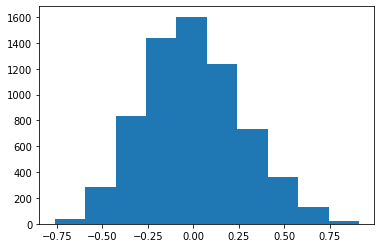

In [73]:
plt.hist(new_test.iloc[0,3:]);

In [237]:
test_final_df = pd.DataFrame(normalize(test_df.iloc[:, 4:]))
# y_pred_test=svr_reg.predict(test_final_df)
y_pred_test=neigh.predict(test_final_df)

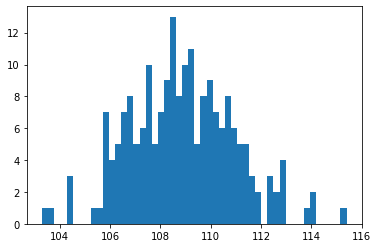

In [238]:
plt.hist(y_pred_test, bins=50);

In [74]:
y_pred_test.max()

116.219079902716

In [50]:
y_pred_test

array([109.85441777, 108.39277004, 111.08723465, 110.36408987,
       108.688151  , 109.47698791, 106.21677321, 109.40234782,
       109.01665127, 108.02039767, 106.54843469, 103.74457317,
       107.43320198, 109.1642719 , 105.02757663, 113.28616026,
       107.69783864, 109.46038366, 108.1803827 , 110.99576696,
       111.48993641, 110.1399893 , 113.58507759, 111.77918267,
       107.97324133, 110.66118234, 112.14888286, 113.39003528,
       108.9383404 , 111.48414401, 109.56171593, 109.94991984,
       111.66532948, 112.4529169 , 109.23789156, 116.2190799 ,
       105.82084603, 106.35747718, 110.69309037, 105.07860744,
       110.88979843, 106.10768447, 110.17548194, 108.61296238,
       102.2785831 , 110.49400332, 112.00868415, 108.97528731,
       110.65812758, 108.67916757, 107.20407875, 105.75483184,
       106.8477371 , 107.42875296, 106.4462214 , 110.82386448,
       110.7565012 , 112.28904521, 108.898604  , 109.21479153,
       107.73449988, 108.70333854, 109.90669138, 110.03

In [239]:
df_leaderboard=pd.DataFrame({'id':test_df['id'],'target':y_pred_test})

In [240]:
df_leaderboard

,id,target
0,17,105.555556
1,19,109.111111
2,25,108.688889
3,32,107.600000
4,33,107.744444
...,...,...
194,777,109.222222
195,783,108.188889
196,784,110.911111
197,792,110.188889


In [241]:
df_leaderboard.to_csv('G14_13',index=False)